In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir(os.getcwd())

['.DS_Store',
 'test.csv',
 'HW1.ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv']

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Questions 1-4

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Question 5

In [5]:
print('Training set missing values:')
print(train.isnull().sum())
print('Test set missing values:')
print(test.isnull().sum())

Training set missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test set missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Question 6

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Question 7

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Question 8

In [8]:
#Unique
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train[['Name','Sex','Cabin','Embarked']].describe()

,Name,Sex,Cabin,Embarked
count,891,891,204,889
unique,891,2,147,3
top,"Rekic, Mr. Tido",male,B96 B98,S
freq,1,577,4,644


# Question 9

In [10]:
train_q9 = train[['Pclass','Survived']].copy(deep=True)

In [11]:
pclass_1 = train_q9[train['Pclass']==1]['Survived'].mean()
pclass_2 = train_q9[train['Pclass']==2]['Survived'].mean()
pclass_3 = train_q9[train['Pclass']==3]['Survived'].mean()
print("Survival of Pclass=1 passengers:", pclass_1)
print("Survival of Pclass=2 passengers:", pclass_2)
print("Survival of Pclass=3 passengers:", pclass_3)

Survival of Pclass=1 passengers: 0.6296296296296297
Survival of Pclass=2 passengers: 0.47282608695652173
Survival of Pclass=3 passengers: 0.24236252545824846


# Question 10

In [12]:
train[["Sex", "Survived"]].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [13]:
female_survival = train[train['Sex'] == 'female']
male_survival = train[train['Sex'] == 'male']

In [14]:
female_surv = female_survival.Survived.sum()/len(female_survival)
male_surv = male_survival.Survived.sum()/len(male_survival)

In [15]:
print("female passengers that survived", female_surv)
print("male passengers that survived", male_surv)

female passengers that survived 0.7420382165605095
male passengers that survived 0.18890814558058924


# Question 11

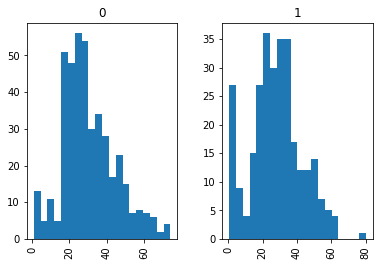

In [16]:
train.hist(column="Age", by="Survived", bins=20)
plt.show()

In [17]:
infants = train[train['Age'] <= 4]
print('infant ratio: ', infants['Survived'].value_counts()[1] / infants['Survived'].count())
oldest = train[train['Age'] == 80]
print('80y/o ratio: ', oldest['Survived'].value_counts()[1] / oldest['Survived'].count())
over15 = train[train['Age'] >= 15]
age15_25 = over15[over15['Age'] <= 25]
print('15-25 ratio: ', age15_25['Survived'].value_counts()[1] / age15_25['Survived'].count())

infant ratio:  0.675
80y/o ratio:  1.0
15-25 ratio:  0.3542600896860987


# Question 12

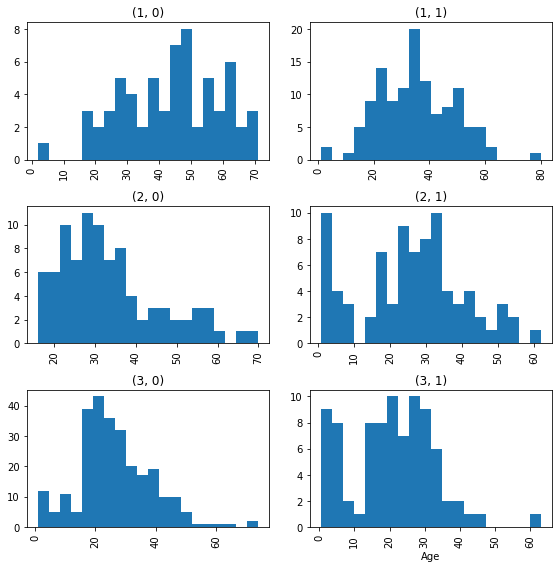

In [18]:
train.hist(column="Age", by=["Pclass","Survived"], bins=20, figsize=(8,8))
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Question 13

In [19]:
train_q13 = train[['Embarked','Sex','Fare','Survived']].copy(deep=True)

In [20]:
embarked = ['C', 'Q', 'S']
survived = [0,1]
var_combs13 = np.array(np.meshgrid(embarked, survived)).T.reshape(-1, 2) 
var_combs13

array([['C', '0'],
       ['C', '1'],
       ['Q', '0'],
       ['Q', '1'],
       ['S', '0'],
       ['S', '1']], dtype='<U21')

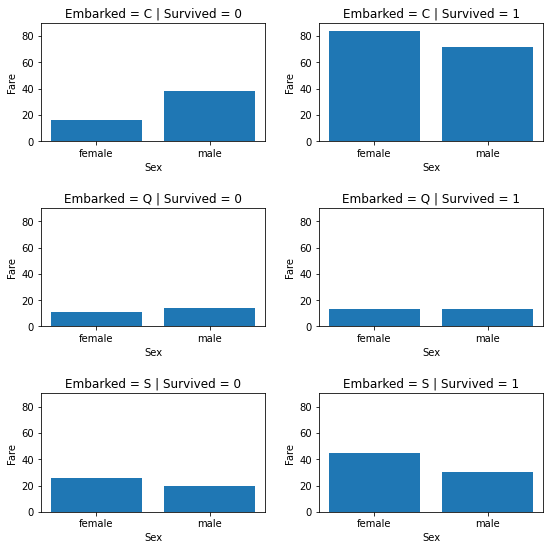

In [21]:
plt.figure(figsize=[8,8])
for i, (embrk, surv) in zip(range(1,len(var_combs13)+1), var_combs13):

  female_mean_fare = train_q13.loc[(train_q13['Embarked']==embrk)&(train_q13['Survived']==int(surv))&(train_q13['Sex']=='female'),'Fare'].mean()
  male_mean_fare = train_q13.loc[(train_q13['Embarked']==embrk)&(train_q13['Survived']==int(surv))&(train_q13['Sex']=='male'),'Fare'].mean()
  
  plt.subplot(3,2,i);plt.title('Embarked = '+str(embrk)+' | '+'Survived = ' + str(surv))
  axes = plt.gca()
  axes.set_ylim([0,90])
  plt.xlabel('Sex')
  plt.ylabel('Fare')
  sex_cat = ['female','male']
  plt.bar(sex_cat,[female_mean_fare,male_mean_fare])
plt.tight_layout(pad=2)

# Question 14

In [22]:
print('duplicates: ', 1 - len(train['Ticket'].unique()) / train['Ticket'].count())

duplicates:  0.23569023569023573


# Question 15

In [23]:
test = pd.read_csv("test.csv")

In [24]:
cabin_q15_train = train.isnull().sum().Cabin
cabin_q15_test = test.isnull().sum().Cabin

In [25]:
print("# of missing values for Cabin in training:", cabin_q15_train)
print("# of missing values for Cabin in test:", cabin_q15_test)

# of missing values for Cabin in training: 687
# of missing values for Cabin in test: 327


# Question 16

In [26]:
train.replace({'male':0, 'female':1}, inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


# Question 17

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
train['Age'] = SimpleImputer(strategy='mean').fit_transform(np.array(train['Age']).reshape(-1, 1))

In [29]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


# Question 18

In [30]:
train["Embarked"].fillna("S", inplace = True)

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


# Question 19

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test_fare_mode = test['Fare'].mode()[0]

In [34]:
test['Fare'].fillna(test_fare_mode, inplace=True)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Question 20